In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")

## Learning Curve

In [45]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Create Data

In [107]:
from sklearn.model_selection import train_test_split

w = 3
b = 0.5
#Create 0~100 1D Array
#特徵1
x = np.linspace(0, 100, 101)
#特徵2
x1 = np.linspace(0, 10, 101)

# randn(row,column,ndim):函数返回一個或一组樣本，具有標準正態分布
# rand(row,column,ndim):函數根據给定维度生成[0,1)之间的數據，包含0，不包含1
y = (x + x1**2 + np.random.randn(101) * 5) * w + b

x = x.reshape(len(x),1)
x1 = x1.reshape(len(x1),1)
y = y.reshape(len(y),1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 30% for testing, 70% for training

# Simple Linear Regression
### sklearn.linear_model.SGDRegressor 隨機梯度下降

In [97]:
from sklearn import linear_model
#linear regression 物件
#learning_rate='constant'學習速度維持常數
#max_iter學習步數
#eta0學習速率
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.00001)
# 訓練模型
sgdr.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-05,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

各變項參數: [5.3015829]


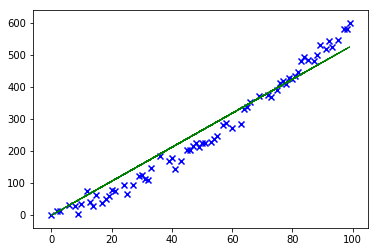

In [98]:
print('各變項參數:', sgdr.coef_)
plt.plot(x_train, sgdr.predict(x_train), color='green', linewidth=1)
plt.scatter(x_train, y_train,  color='blue', marker = 'x')

### SGDrRegression with Learning Curve

<module 'matplotlib.pyplot' from 'C:\\Users\\jas72\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

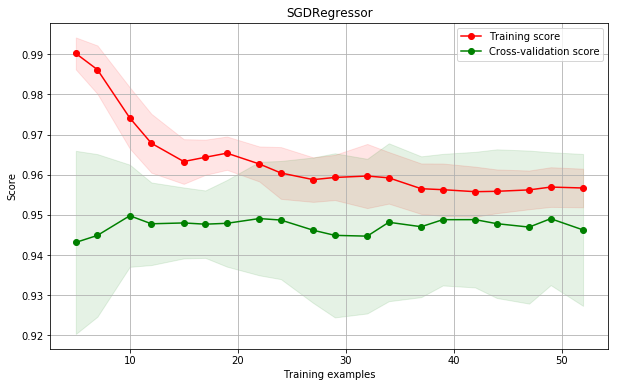

In [105]:
#K折交叉驗證法
#n_splits :區分部分
#shuffle : 隨機打亂後再切四等分
#random_state : 隨機分配的種子值
#Learning Curve 套用所有x與y
estimator = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.00001)
cv = KFold(n_splits=4, random_state=None, shuffle=True)
plot_learning_curve(estimator, "SGDRegressor", x_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 20))

### sklearn.linear_model.LinearRegression

In [100]:
# linear regression
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

各變項參數: [[6.08191347]]


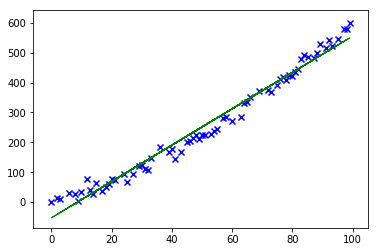

In [101]:
print('各變項參數:', regr.coef_)
plt.plot(x_train, regr.predict(x_train), color='green', linewidth=1)
plt.scatter(x_train, y_train,  color='blue', marker = 'x')

### LinearRegression with Learning Curve

<module 'matplotlib.pyplot' from 'C:\\Users\\jas72\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

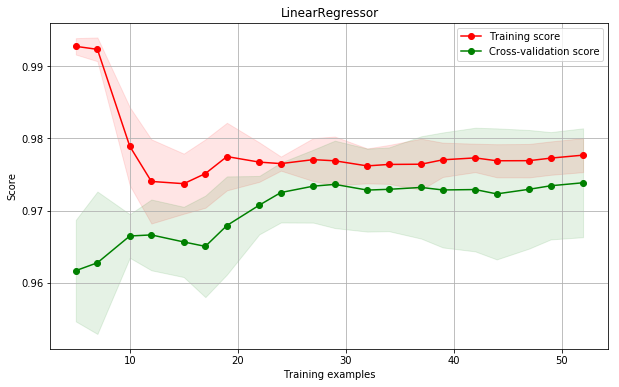

In [104]:
#K折交叉驗證法
#n_splits :區分部分
#shuffle : 隨機打亂後再切四等分
#random_state : 隨機分配的種子值
estimator = linear_model.LinearRegression()
cv = KFold(n_splits=4, random_state=None, shuffle=True)
plot_learning_curve(estimator, "LinearRegressor", x_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 20))

# Multi Linear Regression
### 增加特徵項

In [155]:
df_x_train = pd.DataFrame({'x' : x.flatten().tolist(),'x1' : x1.flatten().tolist()})
df_y_train = pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(df_x_train, df_y_train, test_size = 0.3) # 30% for testing, 70% for training

In [157]:
sgdr = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.00001)
# 訓練模型
sgdr.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=1e-05,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

各變項參數: [5.191104  0.5191104]


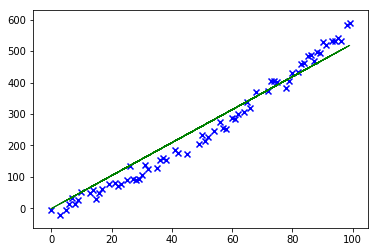

In [164]:
print('各變項參數:', sgdr.coef_)
plt.plot(x_train.x, sgdr.predict(x_train), color='green', linewidth=1)
plt.scatter(x_train.x, y_train,  color='blue', marker = 'x')

### Multi SGDRegression with Learning Curve

<module 'matplotlib.pyplot' from 'C:\\Users\\jas72\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

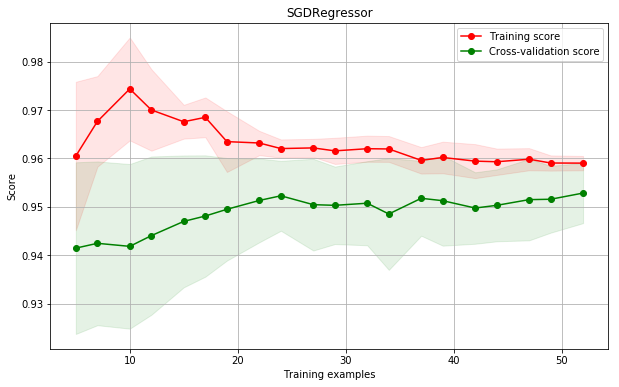

In [165]:
#K折交叉驗證法
#n_splits :區分部分
#shuffle : 隨機打亂後再切四等分
#random_state : 隨機分配的種子值
estimator = linear_model.SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.00001)
cv = KFold(n_splits=4, random_state=None, shuffle=True)
plot_learning_curve(estimator, "SGDRegressor", x_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 20))

# Nonlinear Regression(Polynomial Regression)

In [166]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
X_train_raw = x_train.copy() #原始X_train
X_train_poly = quadratic.fit_transform(X_train_raw) #產生x^0, x^1, x^2

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<module 'matplotlib.pyplot' from 'C:\\Users\\jas72\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

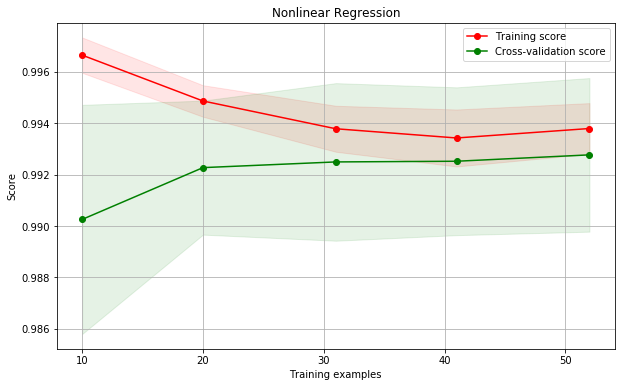

In [171]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "Nonlinear Regression", X_train_poly, y_train, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5))